--- Información General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      4977 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  4992 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
d

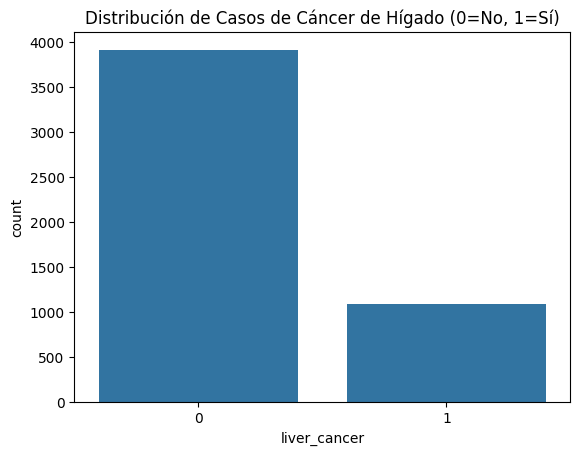

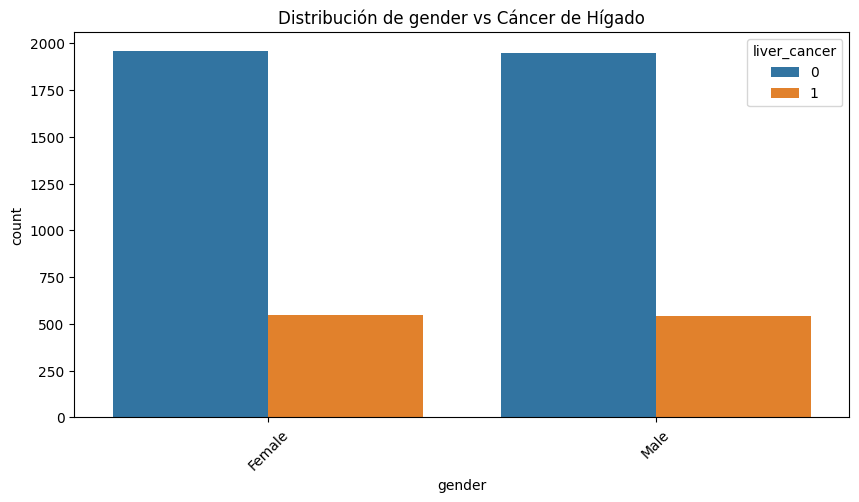

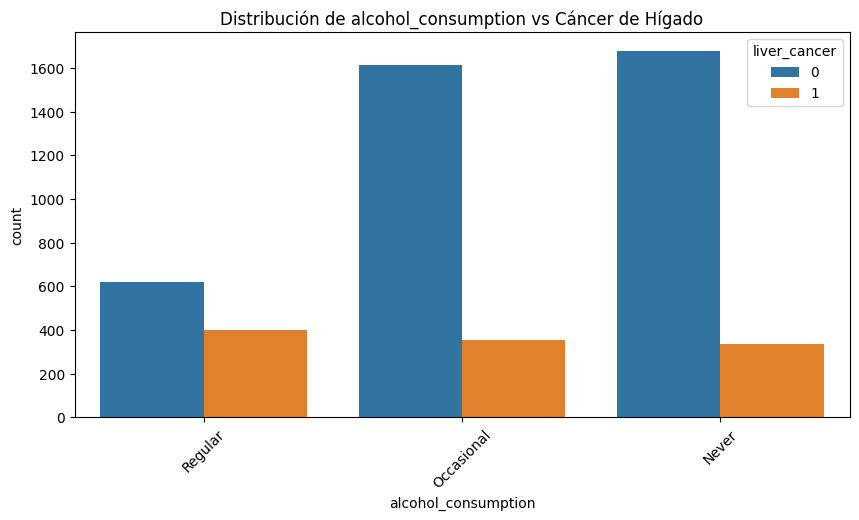

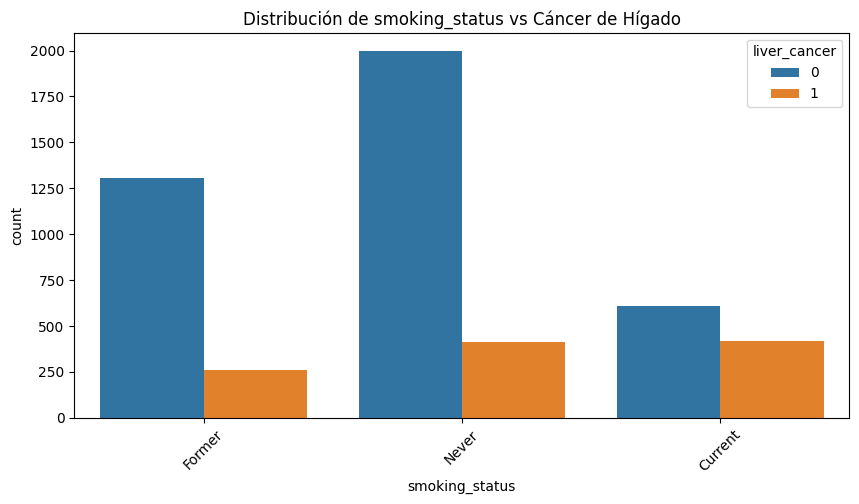

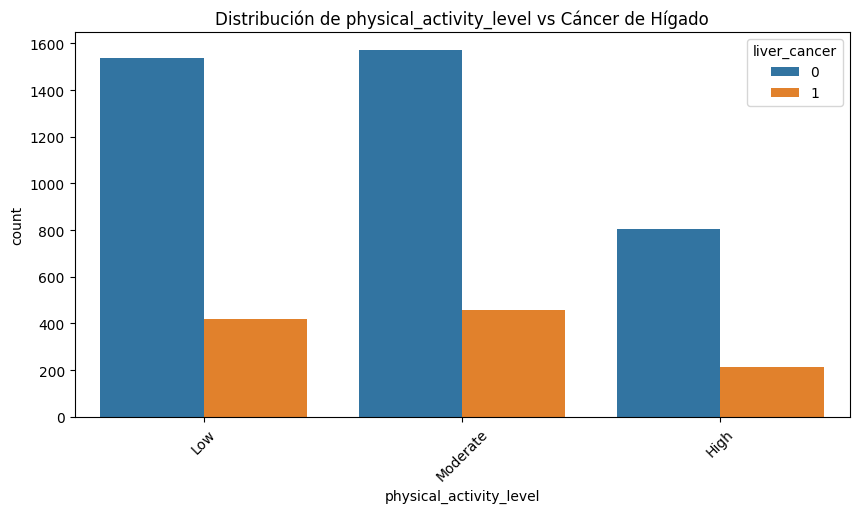

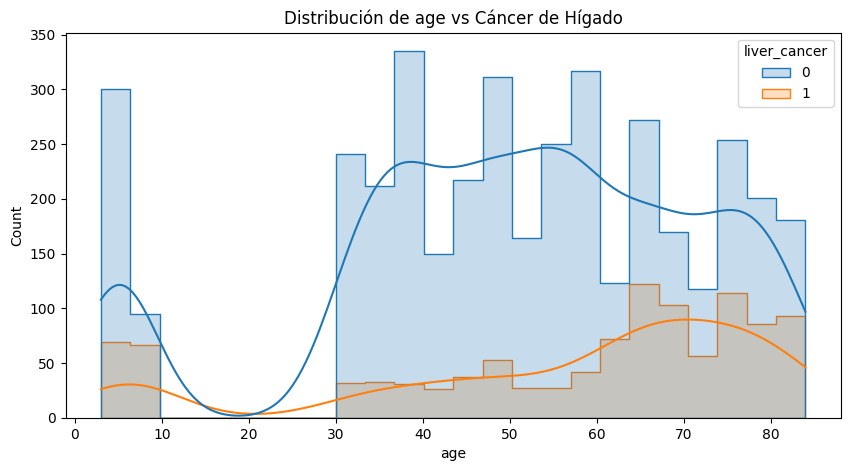

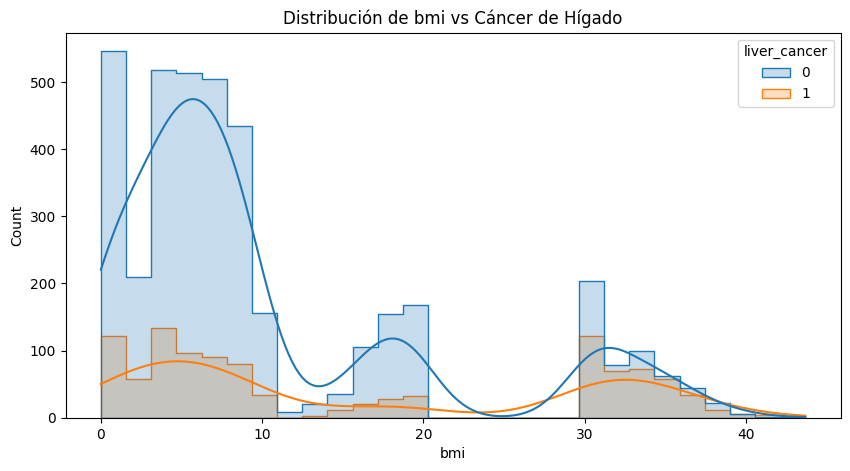

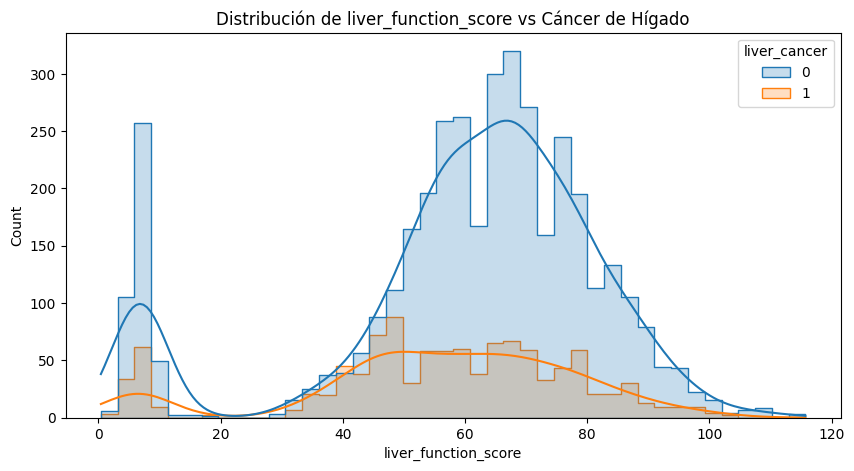

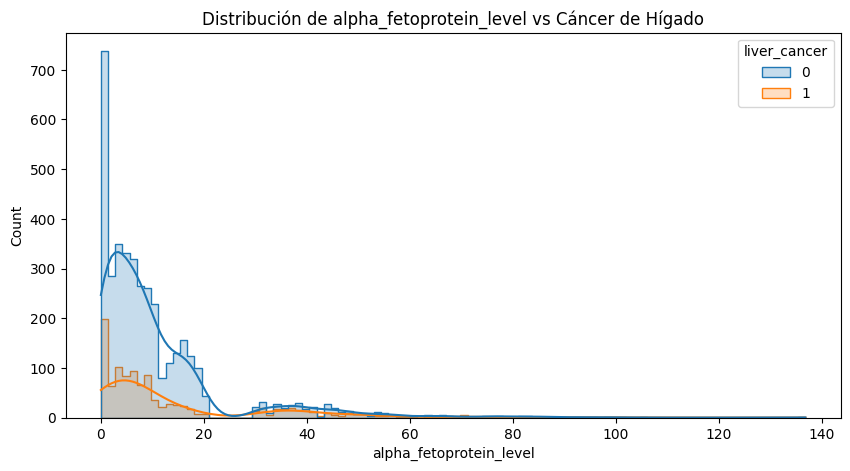

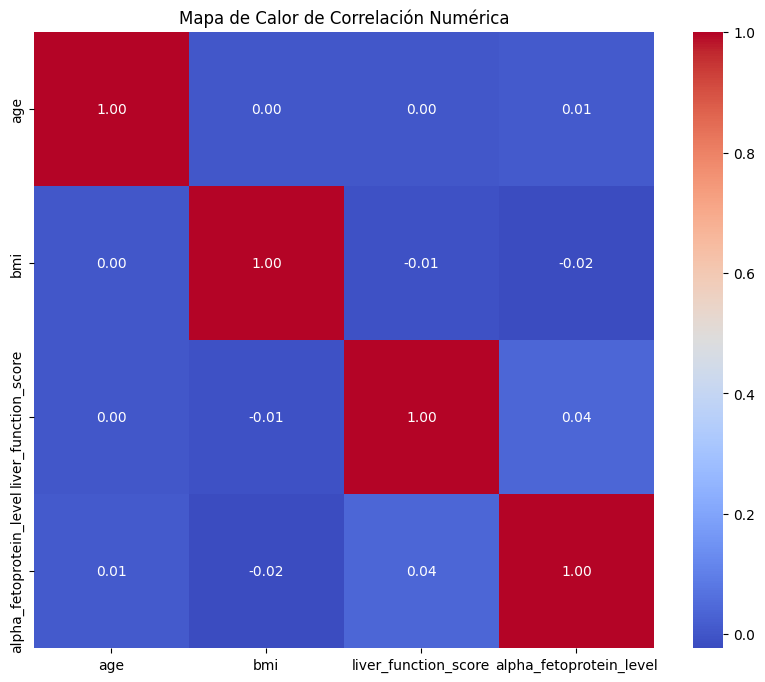

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('datos/synthetic_liver_cancer_dataset.csv')

# 1. Vistazo General
print("--- Información General ---")
df.info()

print("\n--- Descripción de Datos Numéricos ---")
print(df.describe())

# 2. Revisar Valores Faltantes
print("\n--- Valores Faltantes por Columna ---")
print(df.isnull().sum())

# 3. Analizar la Variable Objetivo
print("\n--- Balance de Clases (liver_cancer) ---")
print(df['liver_cancer'].value_counts(normalize=True))

sns.countplot(x='liver_cancer', data=df)
plt.title('Distribución de Casos de Cáncer de Hígado (0=No, 1=Sí)')
plt.show()

# 4. Analizar Categóricas vs Target
categorical_features = ['gender', 'alcohol_consumption', 'smoking_status', 'physical_activity_level']
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='liver_cancer', data=df)
    plt.title(f'Distribución de {col} vs Cáncer de Hígado')
    plt.xticks(rotation=45)
    plt.show()

# 5. Analizar Numéricas vs Target 
numeric_features = ['age', 'bmi', 'liver_function_score', 'alpha_fetoprotein_level']
for col in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, hue='liver_cancer', kde=True, element="step")
    plt.title(f'Distribución de {col} vs Cáncer de Hígado')
    plt.show()

# 6. Correlación de variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación Numérica')
plt.show()
